<a href="https://colab.research.google.com/github/leechanwoo-kor/wine-quality-prediction/blob/main/Wine_Quality_EDA_%26_SVM_%26_GridSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 와인 품질

## 문제 정의
와인의 화학 측정 데이터로 부터 기존에는 미각, 후각으로 측정하던 와인의 품질을 추정한다.

## 가설 수립
산성도, 알코올 도수 등 정량적으로 측정하는 화학데이터로 특징 데이터를 구성한 후 머신러닝을 통해 미각 층정 없이 와인의 품질을 추정할 수 있다.

## 목표
와인의 품질이 좋은지 나쁜지 예측할 수 있는 모델을 수립한다.

## 데이터 구성
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides 
- 6 - free sulfur dioxide 
- 7 - total sulfur dioxide 
- 8 - density 
- 9 - pH 
- 10- sulphates
- 11 - alcohol 
- 12 - quality

# 모델링 프로세스

## 연구 주제 설정
이번 프로젝트의 목적은 "와인의 품질이 좋은지 나쁜지 예측할 수 있는 모델을 수립"하는 것입니다. 

종속변수가 2가지 경우의 수인 Binary Classification 연구이므로, ML Model 중 Classification Model에 대해 학습을 시킨다.

### Binary Classification(이진 분류)
이진 분류라 함은 종속변수의 경우의 수가 2가지인 경우로, 가장 쉬운 예를 들면 동전의 앞면과 뒷면이 있습니다.

여기서도 연구 주제가 "좋은지 나쁜지" 두 가지 경우의 수밖에 존재하지 않습니다. 따라서 이 연구는 분류(Classification)의 문제로 접근을 해야 합니다.

ML(Machine Learning, 기계학습)에서 분류(Classification)에서 사용되는 가장 기초적인 모델들이 있습니다.

베이지안, 로지스틱 회귀(Logistic Regression), SVM, KNN, Decision Tree이 있습니다.

따라서 이 포스팅에서는 간단하게 저 모델들을 어떻게 적용할 수 있는지 소개하도록 하겠습니다.

물론 현재 가장 핫한 모델들 중에 xgboost, lgbm 등이 있지만, 기초 모델의 적용에 초점을 맞춰 있기에 생략하도록 하겠습니다.

## 데이터의 탐구 및 전처리 계획

### 와인의 품질
해당 데이터에서는 와인의 품질이 0 ~ 10까지 품질평가가 이루어졌고, 실제로 들어있는 데이터는 최소 3부터 최대 8점까지 들어있습니다.

이번 연구 주제는 "좋은지 나쁜지"를 확인하는 것이기 때문에 이러한 scale(척도)를 이진분류로 바꿔줄 필요가 있다.

이러한 사항을 꼼꼼히 기록해서 데이터 전처리에 반영한다. 

### 변수간 상이한 척도
해당 데이터는 다양한 변수들이 들어 있습니다.

예를 들어 알콜 농도와 산도를 측정하는 변수가 있는데, 이 두 변수를 그냥 그대로 비교하고 써도 될까요??

정답부터 말씀드리면 그렇게 하면 심각한 오류를 범할 수도 있습니다. 왜냐하면 우리가 알고 싶은 것은 변수 간의 영향력을 보다 객관적으로 측정하여 종속변수에 끼치는 영향을 알아야 되기 때문입니다. 

좀 더 쉬운 예를 들어서, 소금과 식초가 음식 맛에 미치는 영향을 알아보는데, 소금의 단위는 mg 혹은 g단위이고, 식초는 ml 혹은 L 단위입니다. 그렇다면 1g의 소금이 식초 10ml보다 영향이 많이 끼치는지 알기 위해서는 두 단위를 "표준화"시켜야할 필요가 있다는 뜻이죠.

그래서 "변수들의 단위 간 표준화 작업을 실시할 예정"입니다.

## 모델 학습을 위한 준비 및 모델 학습

### 모델 학습을 위한 데이터의 분류

모든 모델링을 실시하기 이전에 데이터를 분류하는 작업을 해야 합니다. 

쉽게 말해서, 학습 시킬 데이터와 진짜로 제대로 예측을 하는지 시험을 보는 데이터로 나누는 것입니다.

|항목|훈련을 위한 데이터|정답 채점을 위한 데이터|
|:---:|:---:|:---:|
|X|X_train|X_test|
|y|y_train|y_test|

X_train과 y_train을 기반으로 모델을 학습시킵니다. 이를 기반으로 모델은 이 데이터를 어떻게 하면 잘 예측할 수 있는지 스스로 배우는 것이죠. 

이제는 진짜 잘 배웠는지 테스트를 하는 단계로 넘어가야 합니다. 그래서 X_test를 모델에 적용시켜 모델이 산출한 정답(Prediction)을 내놓습니다.  이 Prediction 값을 실제 데이터 y_test와 비교 평가를 함으로써 최종적인 모델의 성적이 나옵니다.

#### 대상 모델 정리
이번 다룰 모델은 SVM, Random Forest 모델입니다. 

해당 모델들은 Classification에서 가장 흔히 사용되는 모델들입니다. 여기서는 파라미터 튜닝이나 최적화 과정을 거치지 않고, 디폴트로 설정된 파라미터만 사용할 것입니다. 

이후 많은 모델들을 적용하는 것을 소개함으로써 어떻게 모델링이 진행되는지 익히는 시간을 갖도록 하겠습니다.

#### 모델의 성능 평가 및 결과 시각화
Classification 모델 성능평가에 있어서 다양한 척도가 있습니다. 예를 들어, precision, recall, f1 score, accuracy 등의 지표가 있습니다. 여기서는 가장 간단하고 이해하기 쉬운 Accuracy를 사용하도록 하겠습니다. 

Accuracy란 틀린 것을 틀리다고 답하고, 맞는 것을 맞다고 대답한 비율을 의미합니다. 예를 들어, 10개 중에 8개를 제대로 분류했으면 Accuracy는 80%가 되는 것이죠. 

그리고 해당 모델들이 학습한 결과 독립 변수 중에서 그래서 누가 가장 중요한 변수로 작용했는지 알고 싶을 때가 있을 것입니다. 그래서 이를 위한 시각화 작업도 진행하도록 하겠습니다.

# 데이터 시각화

In [ ]:
# For ML models
from sklearn.linear_model import LinearRegression ,LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC ,SVR
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# For Data Processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 

# For Data Visualization
import matplotlib.pyplot as plt
plt.style.use("ggplot")  #using style ggplot
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Miscellaneous
import os
import random

In [ ]:
# df = pd.read_csv('/kaggle/input/wine-quality-dataset/WineQT.csv')
url = 'https://raw.githubusercontent.com/leechanwoo-kor/wine-quality-prediction/main/kaggle/WineQT.csv'
df = pd.read_csv(url)
del df['Id']
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


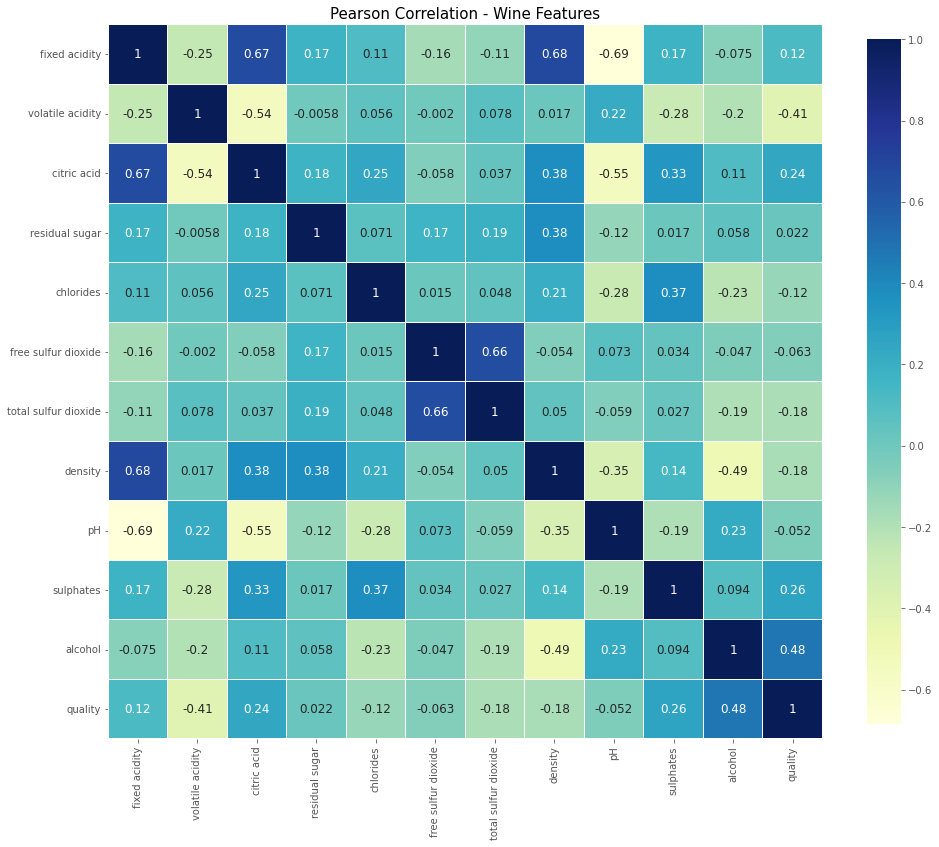

In [ ]:
#correlation map to see correlation between variables

def get_correlation_heatmap(df):
    fig, ax = plt.subplots(figsize=(16, 14))
    
    fig = sns.heatmap(
        df.corr(), 
        cmap = "YlGnBu",
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation - Wine Features', size=15)
    
get_correlation_heatmap(df)

In [ ]:
df_corr_bar = abs(df.corr()['quality']).sort_values()[:-1]
fig = px.bar(df_corr_bar, orientation='h', color_discrete_sequence =['#4285f4']*len(df_corr_bar))
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
# 반응 변수 quality와 가장 양의 상관관계가 깊은 변수는 alchhol 그다음은 sulphates, 음의 상관관계가 깊은 변수는 volatile acidity

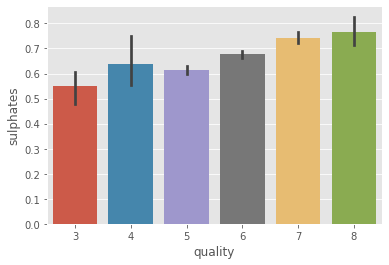

In [ ]:
#quality vs sulphates
sns.barplot(x='quality', y='sulphates',data=df)

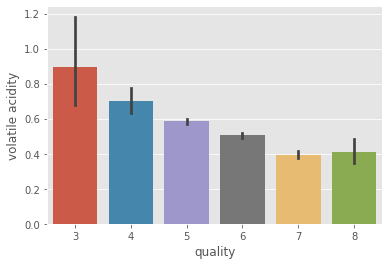

In [ ]:
#quality vs volatile acidity
sns.barplot(x = 'quality', y='volatile acidity', data = df)

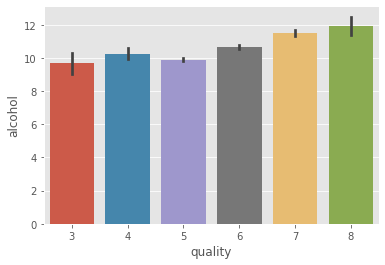

In [ ]:
#quality vs alcohol
sns.barplot(x = 'quality', y='alcohol', data = df)

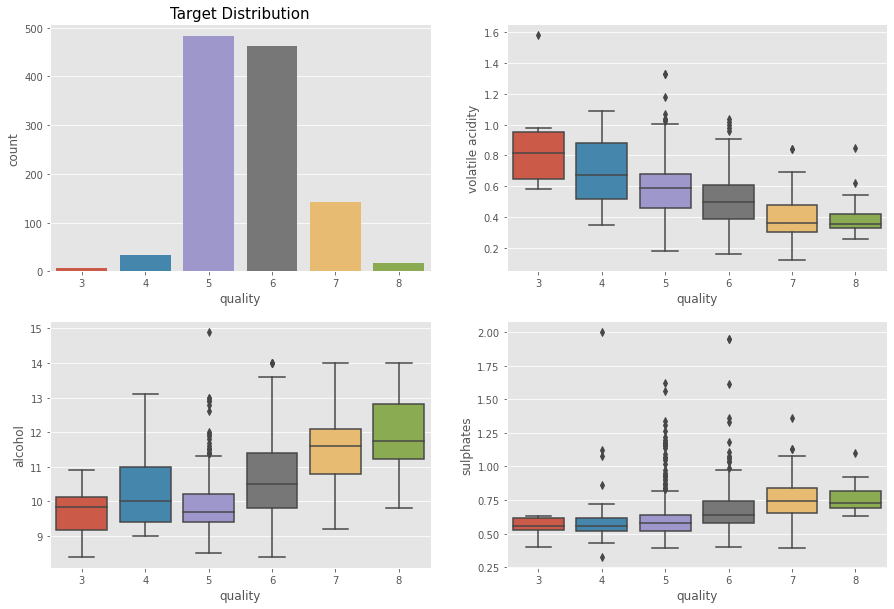

In [ ]:
#boxplot features against wine quality
fig,ax=plt.subplots(2,2,figsize=(15,10))
sns.countplot(x=df.quality,ax=ax[0][0]).set_title('Target Distribution',size=15)
sns.boxplot(x=df.quality,y=df['volatile acidity'],ax=ax[0][1])
sns.boxplot(x=df.quality,y=df['alcohol'],ax=ax[1][0])
sns.boxplot(x=df.quality,y=df['sulphates'],ax=ax[1][1])

In [ ]:
#showing counts before categorize quality column
df['quality'].value_counts()

5    483
6    462
7    143
4     33
8     16
3      6
Name: quality, dtype: int64

In [ ]:
#categorize wine quality
bins = (2,6.5,8)
group_names = ['bad','good']
categories = pd.cut(df['quality'], bins, labels = group_names)
df['quality'] = categories

In [ ]:
#after categorize
df['quality'].value_counts()

bad     984
good    159
Name: quality, dtype: int64

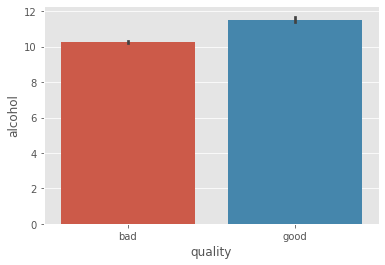

In [ ]:
#barplot of quality vs alcohol.
# more alcohol, better wine
sns.barplot(x='quality', y='alcohol',data=df)

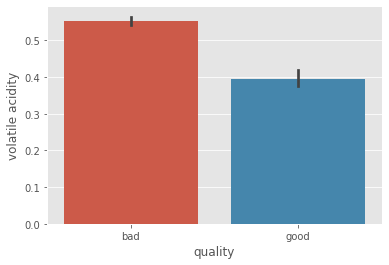

In [ ]:
#barplot of quality vs volatile acidity
#less volatile acidity, better red wine.
sns.barplot(x='quality', y='volatile acidity',data=df)

In [ ]:
#splitting data to X ve y
X = df.drop(['quality'], axis = 1)
y = df['quality']

In [ ]:
# Encoding our dependent variable:Quality column
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
y

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# Splitting the dataset into the Training set and Test set.%20 of dataset for test set,%80 for training set.
# from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Feature Scaling to X_train and X_test to classify better.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#I'll use Kernel SVM model to classify.
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'poly', C=5, gamma=1)
classifier.fit(X_train, y_train)
#Predicting the Test Set
y_pred = classifier.predict(X_test)

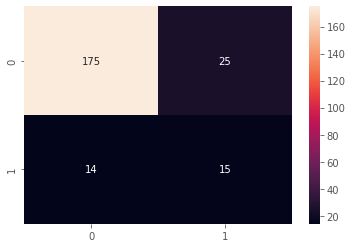

In [ ]:
#making confusing matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')

In [ ]:
#k-Fold cross validation for improving our model
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train,
                             y = y_train, cv = 10)
#we can see model's average accuracy
accuracies.mean()

0.8555422838031532

In [ ]:
#here is the model's standart deviation
accuracies.std()

0.024538894668882486

In [ ]:
#Grid search for best model and parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [6], 'kernel': ['rbf'],
               'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
#here is the best accuracy
best_accuracy

0.90376254180602

In [ ]:
#and here is best parameters
best_parameters

{'C': 6, 'gamma': 0.6, 'kernel': 'rbf'}

In [ ]:
parameters = {'C': [6,8,10,12,14,16], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

svc_model = SVC()

clf = GridSearchCV(svc_model, parameters)
print("Searching for best hyperparameters ...")
clf.fit(X_train, y_train)
print(f'Best Hyperparameters: {clf.best_params_}')

y_pred = clf.predict(X_test)
print('\n')
print(classification_report(y_test,y_pred, zero_division=1))

Searching for best hyperparameters ...
Best Hyperparameters: {'C': 6, 'kernel': 'rbf'}


              precision    recall  f1-score   support

           0       0.92      0.97      0.95       200
           1       0.68      0.45      0.54        29

    accuracy                           0.90       229
   macro avg       0.80      0.71      0.74       229
weighted avg       0.89      0.90      0.90       229



In [ ]:
# Fitting Kernel SVM to the Training set with best parameters
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0, gamma = 0.6)
classifier.fit(X_train, y_train)

#Predicting the Test Set
y_pred = classifier.predict(X_test)

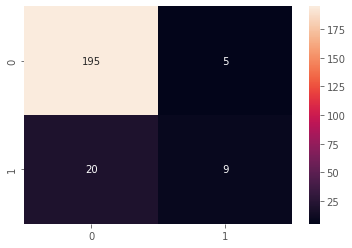

In [ ]:
#making confusing matrix again
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')